In [55]:
import os

# Set the PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT environment variable to 0.6 seconds
# os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '0.7'

import torch
import matplotlib.pyplot as plt
import networkx as nx
# local
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *
from utils import utils
import datasets.simulations as sim
import link_prediction as lp





device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# densification for link prediction: take a subgraph that is not
# link prediction: i know some of the nodes and a bunch is dyads on which i need to predict. so take a subgraph 
# so do a densification on all of the edges you have and omitted dyads are the same

#densification. need to do a special densification here. separate between 1 and 0 after the dyads were omitted. so the dyads omittion needs to happen before the densification which makes everything ugly. why does the dyads omittion happen when it does? i think that the m




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:308:::  
 2024-09-17 13:38:16 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 20000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:370:::  
fit wrapper fit_feats, plotting state at iter 19999


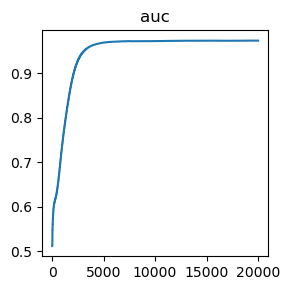



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:423:::  


FINISHED train 
 last accuracies:
auc: 0.9734957955863098


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:429:::  





In [64]:
# train = 85% val = 5% test = 10%
# need to omit 15% of the nodes, then run accuracy on the 5% validation set


photo_ds = import_dataset('photo')
photo_ds.edge_index.shape

dyads_to_omit = lp.get_dyads_to_omit(photo_ds.edge_index, 0.1)
photo_ds_omitted = lp.omit_densify_split(
                            photo_ds, 
                            dyads_to_omit,
                            val_rel_size=0.0)


#todo: check if bigclam and iegam were better in the previous commit
# todo: make densification

#todo: refactor acctracke
#todo: anomaly detection before the algorithm. what to do with the anomalous nodes

config_triplets = [
    # ['feat_opt', 'lr', 0.000001],
    # ['prior_opt', 'lr', 0.000001],
    ['back_forth','n_back_forth', 5]
                   ]

trainer_photo_ieclam = Trainer(
                        dataset=photo_ds_omitted,
                        model_name='bigclam',
                        task='link_prediction',
                        config_triplets_to_change=config_triplets,
                        attr_opt=True,
                        device=device,
)

# for link prediction we need to do the densification after omitting the dyads otherwise... otherwise we need to tell the omit dyads function... why not just do the omit dyads before trainer and have the dataset omitted. that will probably be the easiest and there will be no need for edge index original and all of that crap

losses, acc_test, acc_val = trainer_photo_ieclam.train(
            init_type='small_gaus',
            init_feats=True,
            acc_every=20,
            plot_every=-1,
            verbose=False,
            verbose_in_funcs=False
        )

del photo_ds, photo_ds_omitted
torch.cuda.empty_cache()


In [7]:
acc_test['auc'][-1]
# max(acc_test['auc'])

0.957783663587745